<a href="https://colab.research.google.com/github/laynotena/Data-Mining/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt

In [2]:
def data_generate(data):
    label = []
    text = []
    for i in range(len(data)):
        label.append(data.emoticon[i][0])
        text.append(data.emoticon[i][9:])
    df = pd.DataFrame(data = label, columns=['label'])
    df['text'] = text
    return df

In [3]:
def plot(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [4]:
class RNN():
    def __init__(self, input_dim=3800, output_dim=32, input_length=380, Drop_out=0):
        self.DropOut = Drop_out
        self.rnn = Sequential()
        self.rnn.add(Embedding(input_dim = input_dim, output_dim = output_dim, input_length = input_length ))
        self.rnn.add(Dropout(self.DropOut))
    def build_in(self):
        self.rnn.add(SimpleRNN(units=16))
        self.rnn.add(Dense(units=256,activation='relu'))
        self.rnn.add(Dropout(self.DropOut))
        self.rnn.add(Dense(units=1,activation='sigmoid'))
        self.rnn.summary()
    def fit(self,X_train, Y_train):
        self.rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        self.train_history = self.rnn.fit(X_train,Y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.2)
        plot(self.train_history,'accuracy','val_accuracy')
        plot(self.train_history,'loss','val_loss')
    def evaluation(self, X_test, Y_test):
        self.scores = self.rnn.evaluate(X_test, Y_test, verbose=1)
        print('the accuracy for RNN is : ', self.scores[1])

In [17]:
class lstm():
    def __init__(self, input_dim = 3800, output_dim = 32, input_length = 380, Drop_out = 0):
        self.Drop_out = Drop_out
        self.lstm = Sequential()
        self.lstm.add(Embedding(input_dim = input_dim, output_dim = output_dim, input_length = input_length))
        self.lstm.add(Dropout(0.7))
    def build_in(self):
        self.lstm.add(LSTM(32))
        self.lstm.add(Dense(units=256,activation='relu'))
        self.lstm.add(Dropout(self.Drop_out))
        self.lstm.add(Dense(units=1,activation='sigmoid'))
        self.lstm.summary()
    def fit(self, X_train, Y_train):
        self.lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
        self.train_history = self.lstm.fit(X_train,Y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.2)
        plot(self.train_history,'accuracy','val_accuracy')
        plot(self.train_history,'loss','val_loss')
    def evaluation(self, X_test, Y_test):
        self.score = self.lstm.evaluate(X_test, Y_test, verbose=1)
        print('the accuracy for LSTM is : ', self.score[1])

###1. 資料前處理

In [6]:
training = pd.read_csv('training_label.txt', delimiter = "\t",names = ['emoticon'])
testing = pd.read_csv('testing_label.txt',delimiter = "\t", names = ['emoticon'])

#### 1-a. 建立 train, test 之 DataFrame

In [7]:
train = data_generate(training)
test = data_generate(testing)

In [8]:
Y_train = train['label'].astype(int)
Y_test = test['label'].astype(int)

#### 1-b. 建立 Token

In [9]:
#建立字典
token = Tokenizer(num_words = 3800)
#訓練字典
token.fit_on_texts(train.text)
#轉換文本
X_train_seq = token.texts_to_sequences(train.text)
X_test_seq = token.texts_to_sequences(test.text)

#### 1-c. Padding

In [10]:
X_train = sequence.pad_sequences(X_train_seq, maxlen=380)
X_test = sequence.pad_sequences(X_test_seq, maxlen=380)

### 2. RNN

RNN 沒有 DropOut

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 380, 32)           121600    
_________________________________________________________________
dropout (Dropout)            (None, 380, 32)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
__________________________________________________

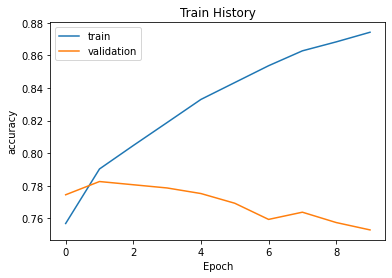

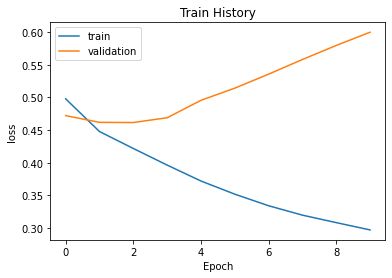

3/3 [==============================] - 0s 19ms/step - loss: 0.6052 - accuracy: 0.8444
the accuracy for RNN is :  0.8444444537162781


In [11]:
model_RNN = RNN()
model_RNN.build_in()
model_RNN.fit(X_train, Y_train)
model_RNN.evaluation(X_test, Y_test)

RNN DropOut = 0.7

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0
________________________________________________

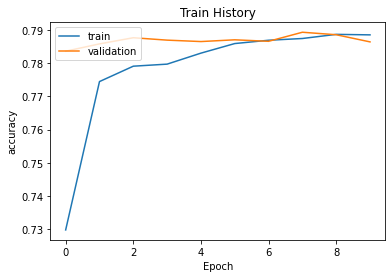

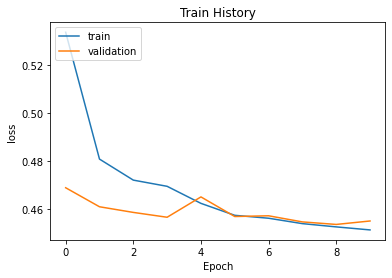

3/3 [==============================] - 0s 23ms/step - loss: 0.4456 - accuracy: 0.8111
the accuracy for RNN is :  0.8111110925674438


In [12]:
model_RNN_Drop = RNN(Drop_out = 0.7)
model_RNN_Drop.build_in()
model_RNN_Drop.fit(X_train, Y_train)
model_RNN_Drop.evaluation(X_test, Y_test)

LSTM 沒有 DropOut

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_8 (Dropout)          (None, 380, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
________________________________________________

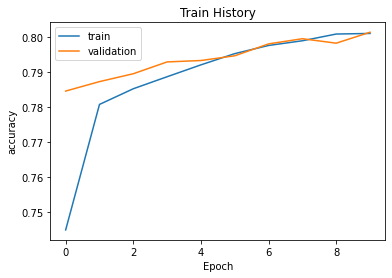

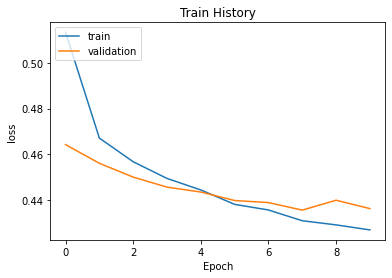

3/3 [==============================] - 0s 44ms/step - loss: 0.4449 - accuracy: 0.8333
the accuracy for LSTM is :  0.8333333134651184


In [18]:
model_LSTM = lstm()
model_LSTM.build_in()
model_LSTM.fit(X_train, Y_train)
model_LSTM.evaluation(X_test, Y_test)

LSTM DropOut=0.7

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 380, 32)           121600    
_________________________________________________________________
dropout_12 (Dropout)         (None, 380, 32)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 138,625
Trainable params: 138,625
Non-trainable params: 0
________________________________________________

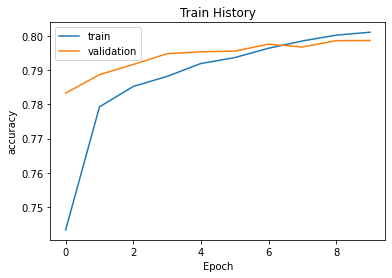

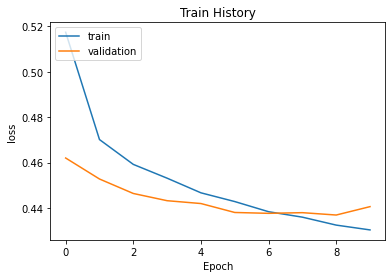

3/3 [==============================] - 0s 52ms/step - loss: 0.4910 - accuracy: 0.8222
the accuracy for LSTM is :  0.8222222328186035


In [20]:
model_LSTM_Drop = lstm(Drop_out=0.7)
model_LSTM_Drop.build_in()
model_LSTM_Drop.fit(X_train, Y_train)
model_LSTM_Drop.evaluation(X_test, Y_test)